#1. 이진 분류(Binary Classification)

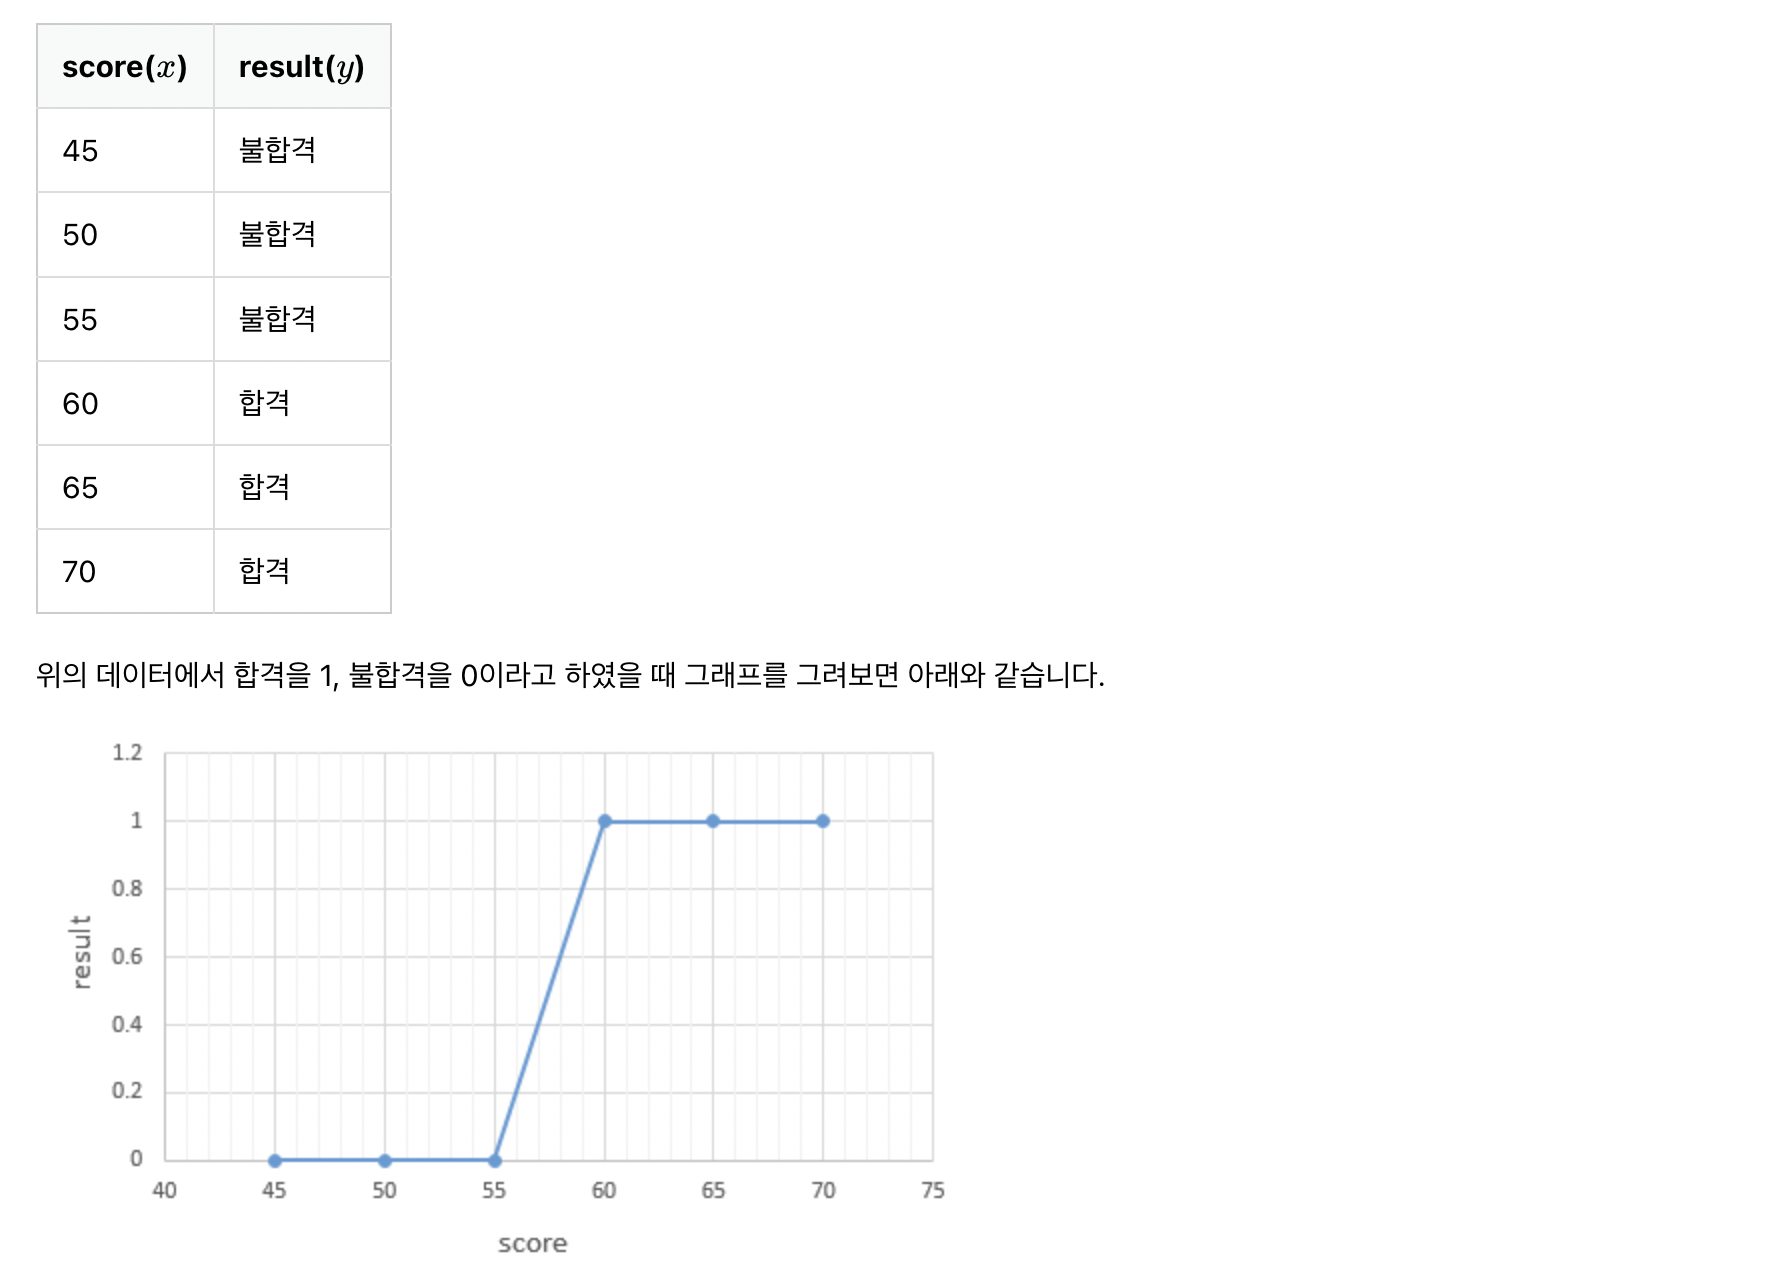

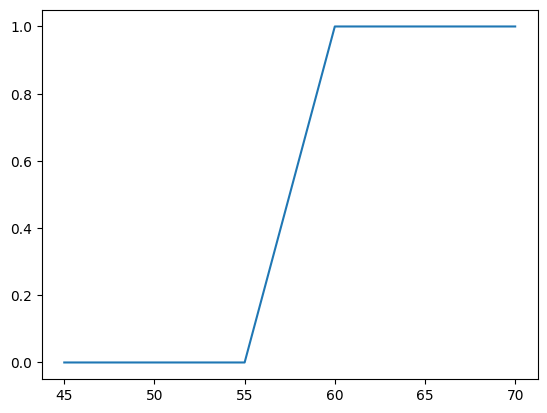

In [2]:
import matplotlib.pyplot as plt

score = [45,50,55,60,65,70]
result = [0,0,0,1,1,1]
plt.plot(score,result)
plt.show()

#2. 시그모이드 함수(Sigmoid function)

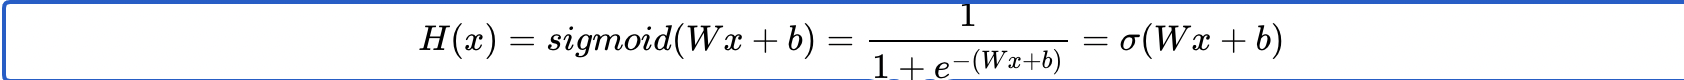

In [3]:
%matplotlib inline      
#%matplotlib inline 을 쓰게 되면 코드를 입력한 셀 밑에 그래프가 바로 출력된다.
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))     #exp -> 지수함수

##1. W가 1이고 b가 0인 그래프

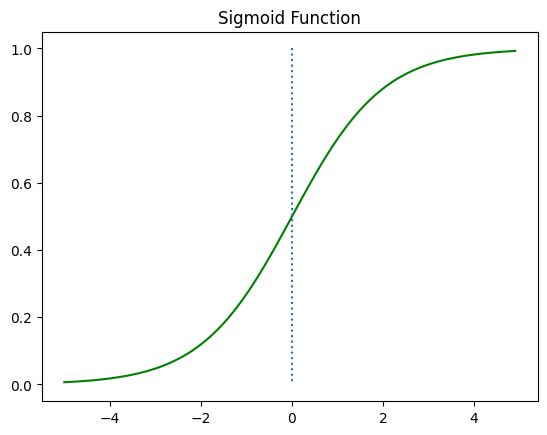

In [5]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)

plt.plot(x,y,'g')
plt.plot([0,0],[1.0,0.0],':')
plt.title('Sigmoid Function')
plt.show()

##2. W값의 변화에 따른 경사도의 변화

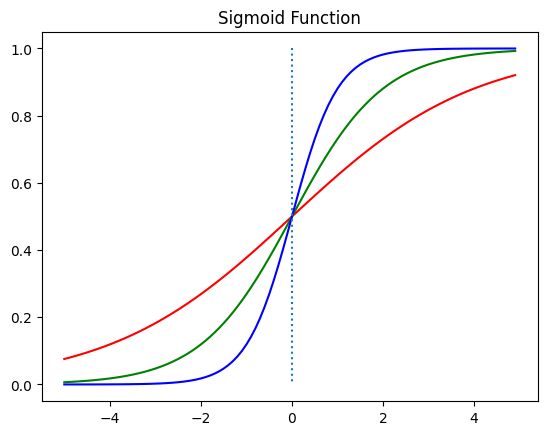

In [6]:
x = np.arange(-5.0,5.0,0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x,y1,'r')
plt.plot(x,y2,'g')
plt.plot(x,y3,'b')
plt.plot([0,0],[1.0,0.0],':')
plt.title('Sigmoid Function')
plt.show()

##3. b값의 변화에 따른 좌, 우 이동

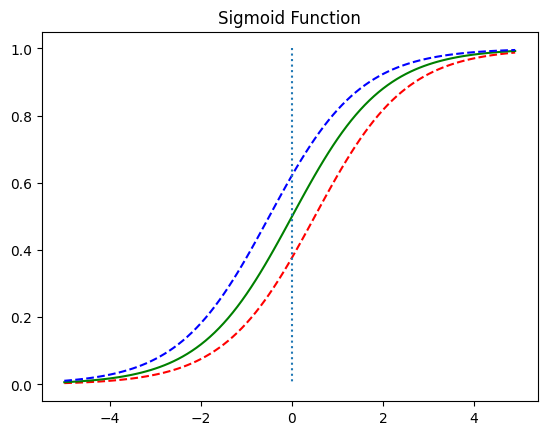

In [7]:
x = np.arange(-5.0,5.0,0.1)
y1 = sigmoid(x-0.5)
y2 = sigmoid(x)
y3 = sigmoid(0.5+x)

plt.plot(x,y1,'r',linestyle = '--')
plt.plot(x,y2,'g')
plt.plot(x,y3,'b',linestyle = '--')
plt.plot([0,0],[1.0,0.0],':')
plt.title('Sigmoid Function')
plt.show()

##4. 시그모이드 함수를 이용한 분류

시그모이드 함수의 출력값은 0과 1 사이의 값을 가지는데 이 특성을 이용하여 분류 작업에 사용할 수 있습니다.

#3. 비용 함수(Cost function)

로지스틱 회귀의 가설 : H(x) = sigmoid(Wx + b)

원래 선형 회귀에서 사용했던 평균 제곱 오차를 로지스틱 회귀의 비용 함수로 사용하게 되면 미분시 심한 비볼록 형태의 그래프가 나온다.

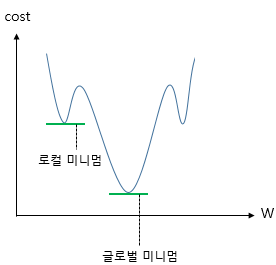

이러한 그래프에서 경사 하강법을 사용할 경우 문제점이 경사 하강법이 오차가 최소값이 되는 구간에 도착했다고 판단한 그 구간이 실제 오차가 완전히 최소값이 되는 구간이 아닐 수도 있다는 것이다.

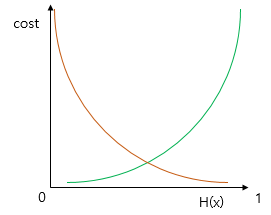

시그모이드 함수의 특징은 함수의 출력값이 0과 1사이라는 점이다. 즉, 실제값이 1일때 예측값이 0에 가까워지면 오차가 커져야 하며, 실제값이 0일 때, 예측값이 1에 가까워지면 오차가 커져야 한다. 이것을 충족하는 함수가 로그 함수이다.

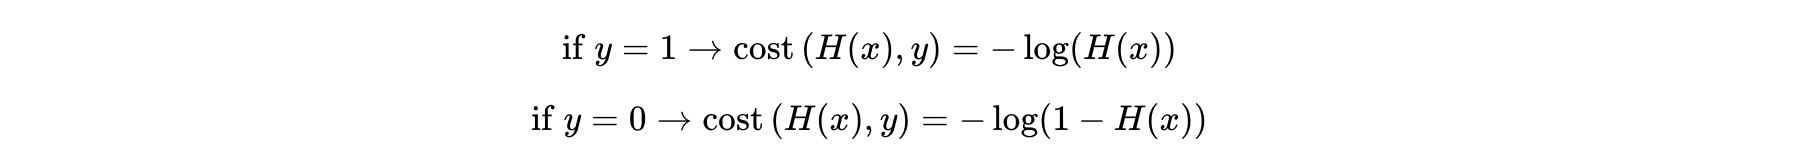

예측값인 H(x)가 1이면 오차가 0이므로 cost는 0이다.  
예측값인 H(x)가 0이면 오차가 1이므로 cost는 무한이다.

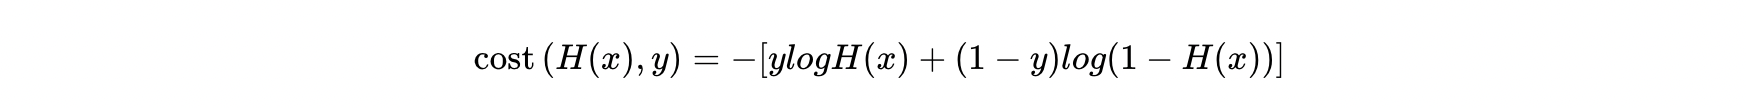

위 두가지 경우를 하나로 합친 식

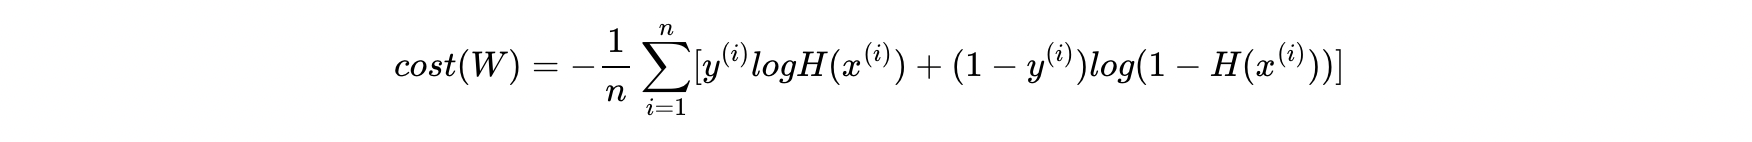

선형회귀와 마찬가지로 모든 오차의 평균을 구해 사용한다.

#4. 파이토치로 로지스틱 회귀 구현하기

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [9]:
torch.manual_seed(1)

In [10]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [11]:
W = torch.zeros((2,1), requires_grad=True) # x와 W를 계산했을때 6 x 1이 되어야하므로 W는 2 x 1이어야 한다.
b = torch.zeros(1, requires_grad=True)

In [12]:
hypothesis = 1/(1+torch.exp(-(x_train.matmul(W)+b)))

In [13]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [14]:
hypothesis = torch.sigmoid(x_train.matmul(W)+b) #matmul은 행렬곱

In [15]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


In [16]:
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [17]:
losses = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [18]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


로지스틱 회귀의 비용 함수

In [20]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [21]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [24]:
W = torch.zeros((2,1), requires_grad = True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W,b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs+1):
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = F.binary_cross_entropy(hypothesis, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [25]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


In [26]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
